In [ ]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../utils')
import handle_db as hdb
import config as config

In [2]:
the_symbol = 'BNB'

In [3]:
print(config.COLUMN_NAMES)

['time_re', 'price_usd', 'volume_usd', 'price_btc', 'volume_btc', 'time_lu']


In [4]:
the_file = f'/home/pablo/MEGA/SEGURO_DE_DATOS/datos/old_database/{the_symbol}_todo.dat'

In [12]:
df = pd.read_csv(the_file, dtype = {'time_re':np.float64, 'price_usd':np.float64, 'price_btc':np.float64, 'volume_usd':np.float64, 'volume_btc':np.float64}, 
                 names = ['time_re', 'price_usd', 'price_btc', 'volume_usd', 'volume_btc'], 
                 usecols=[0, 1, 2, 3, 4], 
                 delim_whitespace = True)
df = df.dropna()
df.tail(10)

,time_re,price_usd,price_btc,volume_usd,volume_btc
105922,439198.852260,22.04,0.002252,412047943.0,42101.557474
105923,439198.940570,21.99,0.002249,432861698.0,44261.335545
105924,439199.029757,21.99,0.002248,434188190.0,44394.794155
105925,439199.120693,22.03,0.002250,432995038.0,44215.697263
105926,439199.209817,22.01,0.002251,445896563.0,45611.723807
105927,439199.299361,22.01,0.002251,445812571.0,45600.379992
105928,439199.389041,22.14,0.002259,434604107.0,44347.584120
105929,439199.477905,22.13,0.002258,447921023.0,45705.713813
105930,439199.567282,22.12,0.002262,436321386.0,44608.849357
105931,439199.656164,22.13,0.002259,407584137.0,41606.945752


In [13]:
df['time_re'] = df['time_re'].apply(lambda x : int(round(x*3600,0)))
df['time_lu'] = df['time_re']
df = df.drop_duplicates(subset="time_re", keep="last")
df = df.sort_values(["time_re"])
#df = df.reset_index()
df.head()

,time_re,price_usd,price_btc,volume_usd,volume_btc,time_lu
0,1524903743,14.7569,0.001623,111687000.0,7.568460e+06,1524903743
1,1524903872,14.7569,0.001623,111687000.0,7.568460e+06,1524903872
2,1524903940,14.7668,0.001622,111514000.0,7.551670e+06,1524903940
3,1524904064,14.7668,0.001622,111514000.0,7.551670e+06,1524904064
4,1524904185,14.7704,0.001622,111475000.0,7.547189e+06,1524904185


(105461, 6)


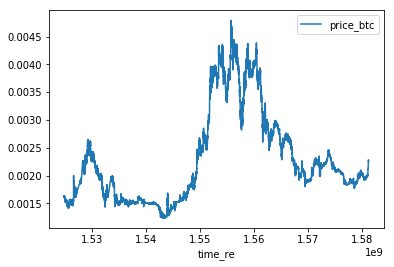

In [18]:
print(df.shape)
df.plot('time_re', 'price_btc')

In [16]:
cnx = hdb.start_mysql_connection(config.DATABASES['old_data'])
cursor = cnx.cursor(buffered=True)

In [17]:
hdb.create_table(cursor, cnx, the_symbol)


True

In [ ]:
for index, row in df.iterrows():
    hdb.write_a_line(cursor, cnx, the_symbol, row.to_dict())